<a href="https://colab.research.google.com/github/StetskoSergey/pida5_stetsko/blob/master/stat_lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
#import kaggle

%matplotlib inline

In [4]:
data=pd.read_csv('auto.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
print('п.1. среднее значение ', data.mean())

п.1. среднее значение  symboling                0.834146
normalized-losses      126.365854
wheel-base              98.756585
length                 174.049268
width                   65.907805
height                  53.724878
curb-weight           2555.565854
engine-size            126.907317
bore                     3.324878
stroke                   3.253366
compression-ratio       10.142537
horsepower             106.048780
peak-rpm              5131.463415
city-mpg                25.219512
highway-mpg             30.751220
price                13312.712195
dtype: float64


In [6]:
print('Медиана ', data.median())

Медиана  symboling                1.00
normalized-losses      122.00
wheel-base              97.00
length                 173.20
width                   65.50
height                  54.10
curb-weight           2414.00
engine-size            120.00
bore                     3.31
stroke                   3.29
compression-ratio        9.00
horsepower              95.00
peak-rpm              5200.00
city-mpg                24.00
highway-mpg             30.00
price                10295.00
dtype: float64


In [7]:
print('Мода', data.mode())

Мода    symboling  normalized-losses    make  ... city-mpg highway-mpg   price
0        0.0              161.0  toyota  ...     31.0        25.0  6785.0
1        NaN                NaN     NaN  ...      NaN         NaN     NaN

[2 rows x 26 columns]


In [8]:
print('Максимальные значения ', data.max())

Максимальные значения  symboling                3
normalized-losses      256
make                 volvo
fuel-type              gas
aspiration           turbo
num-of-doors           two
body-style           wagon
drive-wheels           rwd
engine-location       rear
wheel-base           120.9
length               208.1
width                 72.3
height                59.8
curb-weight           4066
engine-type          rotor
num-of-cylinders       two
engine-size            326
fuel-system           spfi
bore                  3.94
stroke                4.17
compression-ratio       23
horsepower             288
peak-rpm              6600
city-mpg                49
highway-mpg             54
price                45400
dtype: object


In [9]:
print('Минимальные значения ', data.min())

Минимальные значения  symboling                     -2
normalized-losses             65
make                 alfa-romero
fuel-type                 diesel
aspiration                   std
num-of-doors                four
body-style           convertible
drive-wheels                 4wd
engine-location            front
wheel-base                  86.6
length                     141.1
width                       60.3
height                      47.8
curb-weight                 1488
engine-type                 dohc
num-of-cylinders           eight
engine-size                   61
fuel-system                 1bbl
bore                        2.54
stroke                      2.07
compression-ratio              7
horsepower                    48
peak-rpm                    4150
city-mpg                      13
highway-mpg                   16
price                       5118
dtype: object


In [10]:
print('Стандартное отклонение ', data.std())

Стандартное отклонение  symboling               1.245307
normalized-losses      35.438400
wheel-base              6.021776
length                 12.337289
width                   2.145204
height                  2.443522
curb-weight           520.680204
engine-size            41.642693
bore                    0.273049
stroke                  0.313937
compression-ratio       3.972040
horsepower             43.468803
peak-rpm              480.933330
city-mpg                6.542142
highway-mpg             6.886443
price                8102.472461
dtype: float64


***Матрица корреляции***

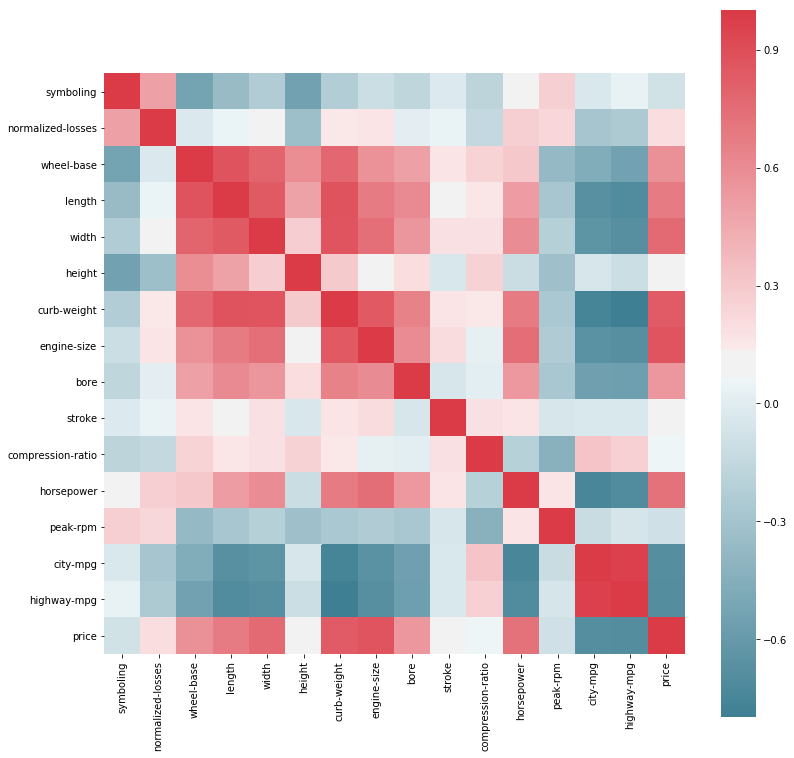

In [11]:
f, ax = plt.subplots(figsize=(13, 13))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

 Рассчитать основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение) 3. Рассчитать и визуализировать корреляционную матрицу для переменных 4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis 5. Визуализировать несколько взаимосвязей между переменными 6. Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test. 7. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте. 
 

***рассчитать показатели skewness и kurtosis***

In [0]:
x = data['price']
kurtosis_scipy = stats.kurtosis(x)
kurtosis_pandas = pd.DataFrame(x).kurtosis()[0]

print(kurtosis_scipy, kurtosis_pandas)

2.848082544390688 2.948637293212561


***Графики плотности распределения значений***

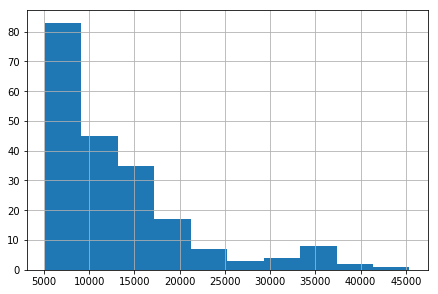

In [0]:
#Графики плотности распределения значений
data['price'].hist()
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

***Графики сравнения распределения двух выборок***

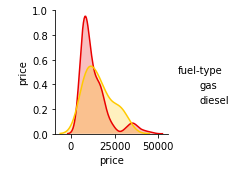

In [0]:
data_an = data[['fuel-type','price']]
sns.pairplot(data=data_an,hue='fuel-type',plot_kws={'alpha':0.2},palette='hot')
plt.show()


***Распределение обоих графиков нормальное, машины на газе имеют меньший разброс***

***Парные графики Мощности двигателя и цена***

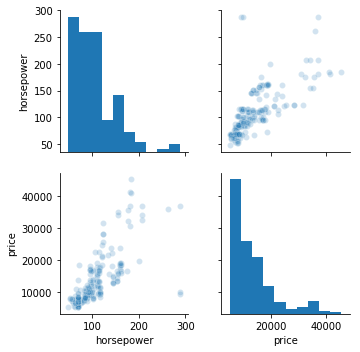

In [0]:
data_an = data[['horsepower','price']]
sns.pairplot(data=data_an,plot_kws={'alpha':0.2},palette='hot')
plt.show()


***Видна линейная зависимость мощности двигателя и стоимости***

In [0]:
data['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [0]:
Выдвинем нулевую гипотезу, что машины с топливом газ стоят столько же сколько и на дизеле

In [0]:
gas = data[data['fuel-type']=='gas']['price']

dizel = data[data['fuel-type']=='diesel']['price']

stats.ttest_ind(gas, dizel)

Ttest_indResult(statistic=-1.4715061487687495, pvalue=0.1427027883743746)

In [0]:
Вывод - гипотеза нулевая гипотеза подтверждается, вероятность p примерно в три раза больше 5%, выборка машин на газе и дизеле статистически значимы

In [0]:
print('средняя стоимость машин на газе', gas.mean())
print('средняя стоимость машин на дизеле', dizel.mean())

средняя стоимость машин на газе 13039.691891891893
средняя стоимость машин на дизеле 15838.15
